<a href="https://colab.research.google.com/github/anatasyatata/Portofolio/blob/main/FMCG_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What we want to know from this data?

1. which product category who has big sales volume
2. Where store location who has a big sales volume
3. which weekday who has a big sales volume
4. let's see the flunctuantive the data from 2022 - 2024 in years and months
5. Correlation for every variable


# Import Data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
/
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/extended_fmcg_demand_forecasting.csv")

In [14]:
df

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334
...,...,...,...,...,...,...,...,...,...,...
995,2024-09-22,Snacks,1766,17.560357,0,Suburban,6,0.865387,8,372
996,2024-09-23,Beverages,1023,5.877190,1,Urban,0,5.645062,4,188
997,2024-09-24,Beverages,1837,13.640550,0,Suburban,1,11.813083,6,170
998,2024-09-25,Household,854,16.206743,0,Suburban,2,8.676447,9,143


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
# Extract year from the 'date' column
df['year'] = df['Date'].dt.year

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1000 non-null   datetime64[ns]
 1   Product_Category         1000 non-null   object        
 2   Sales_Volume             1000 non-null   int64         
 3   Price                    1000 non-null   float64       
 4   Promotion                1000 non-null   int64         
 5   Store_Location           1000 non-null   object        
 6   Weekday                  1000 non-null   int64         
 7   Supplier_Cost            1000 non-null   float64       
 8   Replenishment_Lead_Time  1000 non-null   int64         
 9   Stock_Level              1000 non-null   int64         
 10  year                     1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(2)
memory usage: 82.2+ KB


In [17]:
df.describe()

,Date,Sales_Volume,Price,Promotion,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,year
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2023-05-15 12:00:00,1048.781000,10.362358,0.491000,2.999000,7.552047,4.970000,266.494000,2022.905000
min,2022-01-01 00:00:00,101.000000,1.003580,0.000000,0.000000,0.500445,1.000000,50.000000,2022.000000
25%,2022-09-07 18:00:00,591.750000,5.541108,0.000000,1.000000,3.887763,3.000000,152.000000,2022.000000
50%,2023-05-15 12:00:00,1064.500000,10.404366,0.000000,3.000000,7.422058,5.000000,260.000000,2023.000000
75%,2024-01-20 06:00:00,1489.000000,15.054035,1.000000,5.000000,11.099853,7.000000,376.000000,2024.000000
max,2024-09-26 00:00:00,1997.000000,19.944485,1.000000,6.000000,14.993587,9.000000,499.000000,2024.000000
std,NaN,539.688298,5.420627,0.500169,2.001751,4.163729,2.589944,130.560078,0.791582


In [18]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Sales_Volume,0
Price,0
Promotion,0
Store_Location,0
Weekday,0
Supplier_Cost,0
Replenishment_Lead_Time,0
Stock_Level,0


# EDA

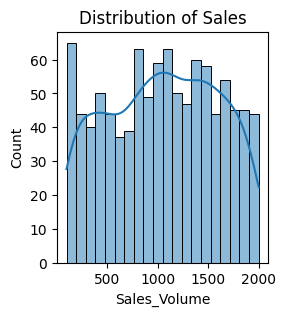

In [19]:
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales_Volume'], bins=20, kde=True)
plt.title('Distribution of Sales');

Sales Volume show that value 1000 - 1250 are most domination

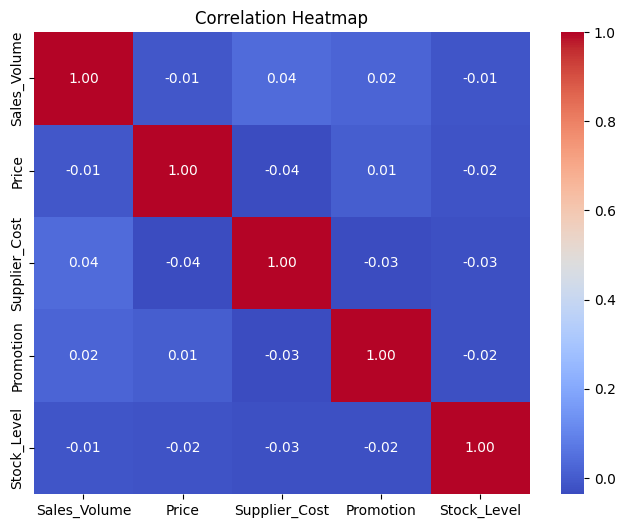

In [20]:
correlation_matrix = df[['Sales_Volume', 'Price', 'Supplier_Cost','Promotion', 'Stock_Level']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

There are no strong correlations between any variables.

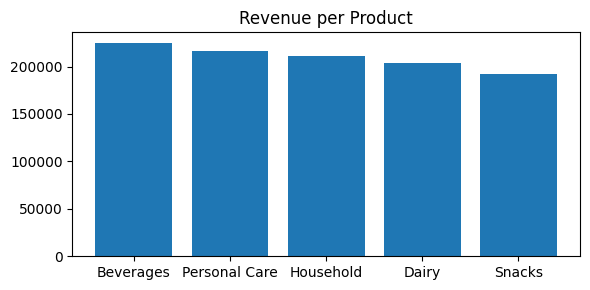

In [21]:
plt.figure(figsize=(6,3))
# Group the data by 'Product_Category' and calculate the sum of 'Sales_Volume'
category_sales = df.groupby('Product_Category')['Sales_Volume'].sum()

category_sales = category_sales.sort_values(ascending=False)

# Create the bar chart using the index (Product_Category) and values (Sales_Volume)
plt.bar(category_sales.index, category_sales.values)

plt.title('Revenue per Product') # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Total Sales Volume of Beverages is the highest than other product category

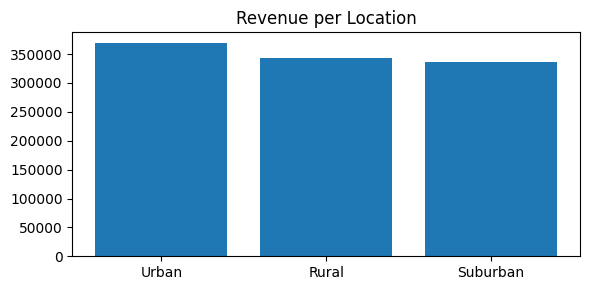

In [22]:
plt.figure(figsize=(6,3))
# Group the data by 'Store_Location' and calculate the sum of 'Sales_Volume'
location_sales = df.groupby('Store_Location')['Sales_Volume'].sum()

location_sales = location_sales.sort_values(ascending=False)

# Create the bar chart using the index (Store_Location) and values (Sales_Volume)
plt.bar(location_sales.index, location_sales.values)

plt.title('Revenue per Location')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Urban has a highest sales volume than other location

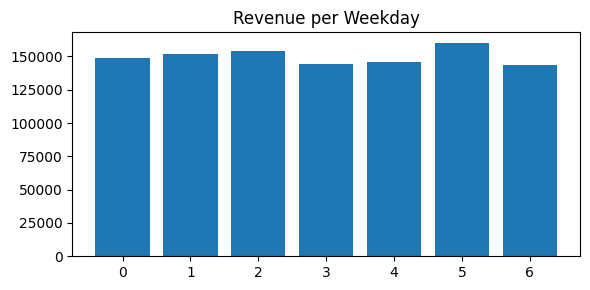

In [23]:
plt.figure(figsize=(6,3))

weekday = df.groupby('Weekday')['Sales_Volume'].sum()

weekday = weekday.sort_values(ascending=False)

plt.bar(weekday.index, weekday.values)

plt.title('Revenue per Weekday')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [24]:
weekday

,Sales_Volume
Weekday,
5,160127
2,153962
1,151935
0,148823
4,146164
3,144007
6,143763


Friday has highest total sales volume than other day

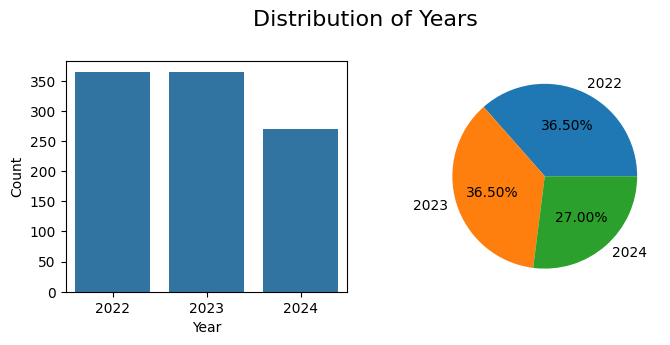

In [25]:
# Calculate the count of each year
year_counts = df['year'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Countplot for the distribution of years
sns.countplot(data=df, x='year', ax=ax[0])
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(year_counts.values, labels=year_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Years', fontsize=16, y=1.05)
plt.show()

The total count of sales in 2022 it's same with 2023, but in 2024 there is
declined. But, 2024 only has 9 month unlike 2022 and 2023.

In [26]:
import warnings
import plotly.express as px
warnings.simplefilter(action='ignore', category=FutureWarning)

fig = px.line(df, x="Date", y="Sales_Volume", title="Sales of All Stores Over Time")
fig.show(render='iframe')

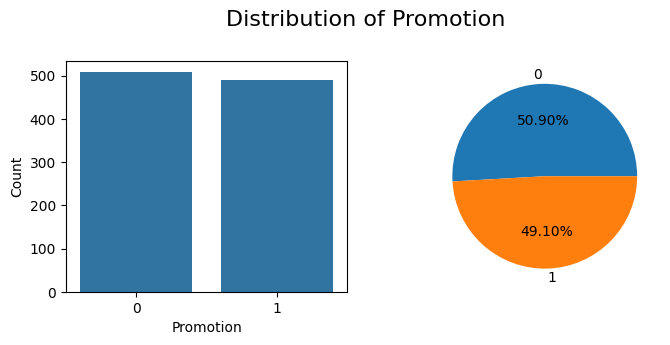

In [27]:
# Calculate the count of each year
promotion_counts = df['Promotion'].value_counts()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# Countplot for the distribution of years
sns.countplot(data=df, x='Promotion', ax=ax[0])
ax[0].set_xlabel('Promotion')
ax[0].set_ylabel('Count')

# Pie chart for the distribution of years
ax[1].pie(promotion_counts.values, labels=promotion_counts.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Promotion', fontsize=16, y=1.05)
plt.show()

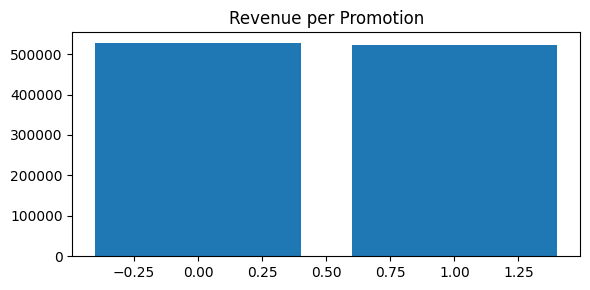

In [28]:
plt.figure(figsize=(6,3))

promo = df.groupby('Promotion')['Sales_Volume'].sum()

promo = promo.sort_values(ascending=False)

plt.bar(promo.index, promo.values)

plt.title('Revenue per Promotion')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [29]:
promo

,Sales_Volume
Promotion,
0,527411
1,521370


The difference between Product who has promotion or not isn't significant on Total Sales Volume

Product

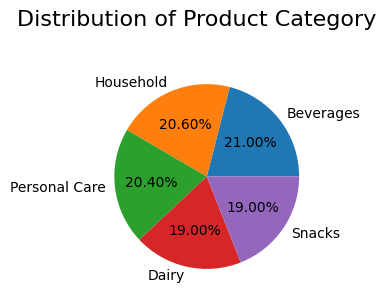

In [30]:
# Calculate the count of each year
Product = df['Product_Category'].value_counts()

# Plotting
ax = plt.subplots(figsize=(8, 3))


# Pie chart for the distribution of years
ax[1].pie(Product.values, labels=Product.index, autopct='%1.2f%%')

# Set a single title for the entire figure
plt.suptitle('Distribution of Product Category', fontsize=16, y=1.05)
plt.show()

In [31]:
Product

,count
Product_Category,
Beverages,210
Household,206
Personal Care,204
Dairy,190
Snacks,190


Beverages has biggest total product other than

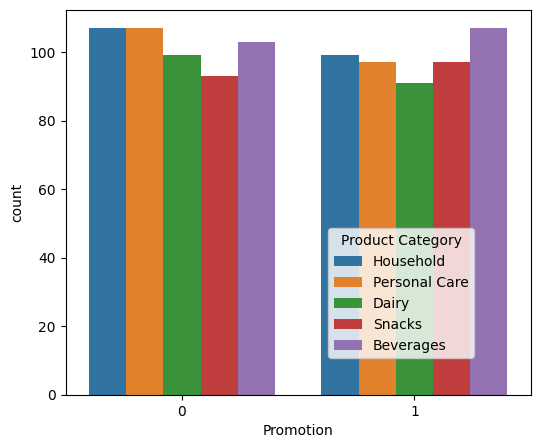

In [32]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5))
g = sns.countplot(x="Promotion", hue="Product_Category", data=df, ax = ax)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title='Product Category')
plt.show()

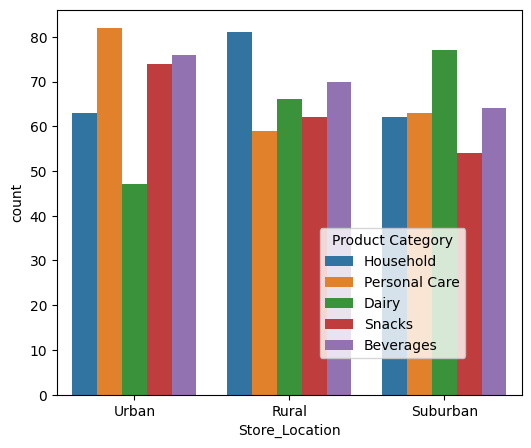

In [33]:
fig, ax = plt.subplots(figsize=(6, 5))
g = sns.countplot(x="Store_Location", hue="Product_Category", data=df, ax = ax)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title='Product Category')
plt.show()

Top Product best seller in each store location are Personal in Urban, Household in Rural and Dairy in Suburban

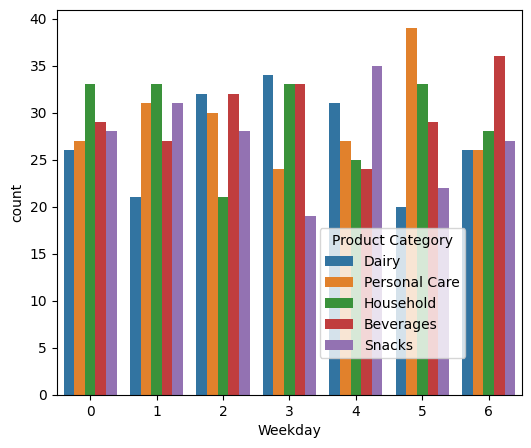

In [34]:
fig, ax = plt.subplots(figsize=(6, 5))
g = sns.countplot(x="Weekday", hue="Product_Category", data=df, ax = ax)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title='Product Category')
plt.show()

# Conclusion

1. Sales Volume show that value 1000 - 1250 are most domination
2. Total Sales Volume of Beverages is the highest than other product category
3. Urban has a highest sales volume than other location
4. Friday has highest total sales volume than other day
5. The total count of sales in 2022 it's same with 2023, but in 2024 there is declined. But, 2024 only has 9 month unlike 2022 and 2023.
6. The difference between Product who has promotion or not isn't significant on Total Sales Volume
7. Beverages has biggest total product other than
8. Top Product best seller in each store location are Personal in Urban, Household in Rural and Dairy in Suburban

# Suggestion

1. Since beverages outperform other categories, consider introducing more variety or premium options.
2. Explore cross-selling strategies, bundling beverages with complementary products.
3. Enhance marketing and stock availability in urban areas to maintain the lead.
4. Investigate potential expansion opportunities in suburban and rural areas to increase sales there.
5. Capitalize on this trend by offering targeted promotions or discounts on Fridays.
6. Tailor product inventory and marketing strategies to match local preferences (e.g., focus on Personal products in Urban stores, Household in Rural, Dairy in Suburban).
7. Consider localized promotions based on top-performing products in each region.